# Student Performance Analysis

## Overview
This project implements a predictive model to analyze and forecast student academic performance based on various influential factors. The model takes into account multiple parameters including:
- Study hours
- Previous academic scores
- Sleep duration
- Extra-curricular participation

## Methodology
The analysis employs Multiple Linear Regression, a statistical technique that allows us to understand the relationship between multiple independent variables and a dependent variable (student performance in this case).

## Dataset
The analysis utilizes the "Student Performance Dataset" from Kaggle, which provides comprehensive data for building and validating our predictive model. Dataset source: [Student Performance Dataset](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

## Objectives
- Develop a reliable predictive model for student performance
- Identify key factors that influence academic success
- Provide insights for educational institutions and students
- Enable data-driven decision making in educational planning


## 1. Import Required Libraries

In [83]:
#import the necessary libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error

np.set_printoptions(precision=2)



## 2. Data Loading and Initial Exploration

### Load the Dataset

In [84]:
df = pd.read_csv("Student_Performance.csv")

### Explore Dataset Structure
Let's examine the dataset to understand its structure, size, and characteristics:


In [85]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (10000, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

First 5 rows:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51

This initial exploration helps us understand:
- The number of samples and features in our dataset
- Data types of each column
- Presence of missing values
- Statistical distribution of numerical features

## 3. Feature and Target Variable Definition

### Define Features (X) and Target (y)

In [86]:
X = df[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]] 
y = df["Performance Index"]


We select five key features that potentially influence student performance:
- **Hours Studied**: Time invested in studying
- **Previous Scores**: Historical academic performance
- **Extracurricular Activities**: Participation in non-academic activities
- **Sleep Hours**: Daily sleep duration
- **Sample Question Papers Practiced**: Number of practice papers completed

## 4. Data Preprocessing


### Categorical Encoding
The "Extracurricular Activities" column contains categorical data ("Yes"/"No") that needs to be converted to numerical format for linear regression:

In [87]:
print(f"\nExtracurricular Activities distribution:")
print(X["Extracurricular Activities"].value_counts())

#Encode Extra Curricular Activities
X.loc[:, "Extracurricular Activities"] = X["Extracurricular Activities"].map({"Yes":1,"No":0})
X_features = ["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]

print(f"\nExtracurricular Activities encoded:")
print(X["Extracurricular Activities"].value_counts())



Extracurricular Activities distribution:
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

Extracurricular Activities encoded:
Extracurricular Activities
0    5052
1    4948
Name: count, dtype: int64


This binary encoding transforms:
- "Yes" → 1 (participates in extracurricular activities)
- "No" → 0 (does not participate)

## 5. Exploratory Data Analysis (EDA)

### Distribution Analysis
Understanding the distribution of each feature helps identify patterns and potential outliers:

(array([ 34., 142., 258., 371., 549., 552., 830., 671., 849., 630., 824.,
        657., 822., 628., 741., 488., 476., 269., 166.,  43.]),
 array([ 10. ,  14.5,  19. ,  23.5,  28. ,  32.5,  37. ,  41.5,  46. ,
         50.5,  55. ,  59.5,  64. ,  68.5,  73. ,  77.5,  82. ,  86.5,
         91. ,  95.5, 100. ]),
 <BarContainer object of 20 artists>)

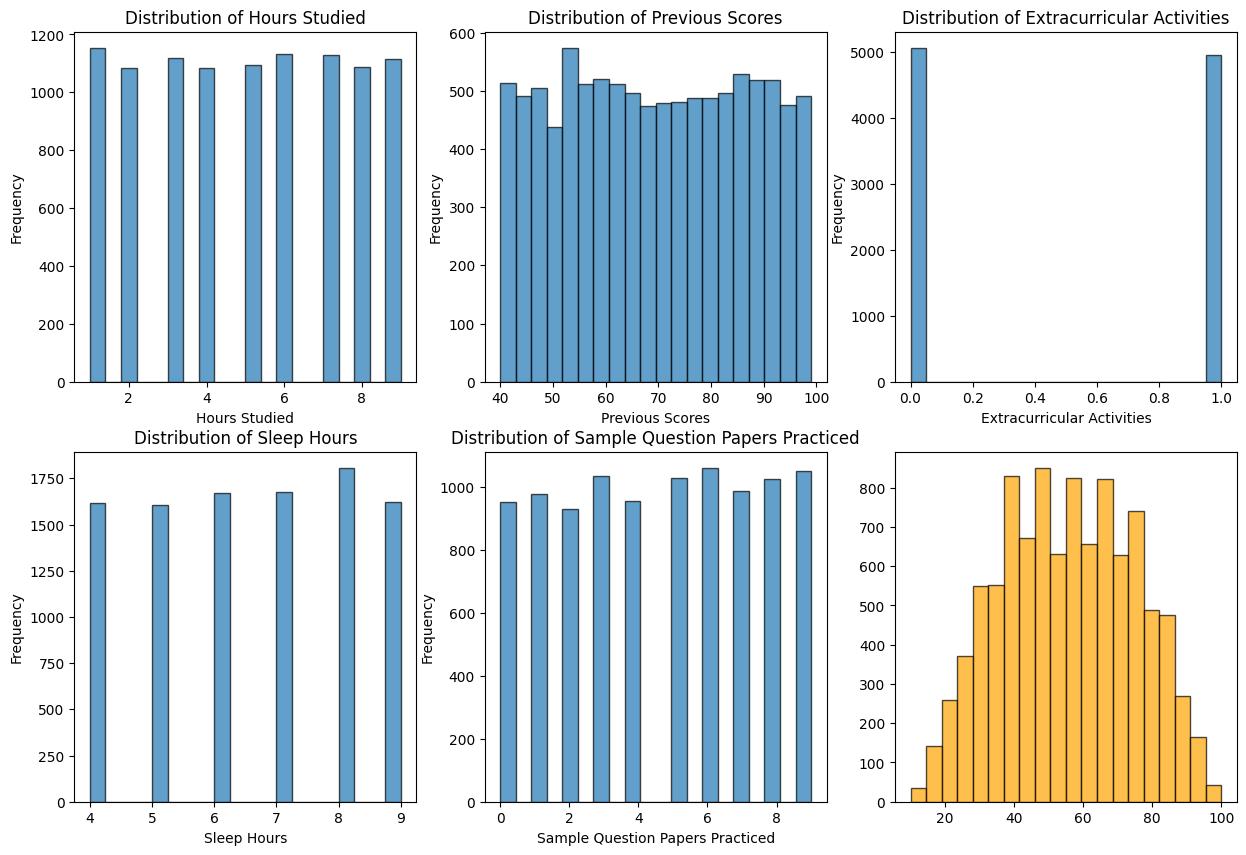

In [88]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(X_features):
    axes[i].hist(X[feature], bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

axes[5].hist(y, bins=20, alpha=0.7, edgecolor='black', color='orange')


### Feature-Target Relationship Analysis
Scatter plots reveal the relationship between each feature and student performance:

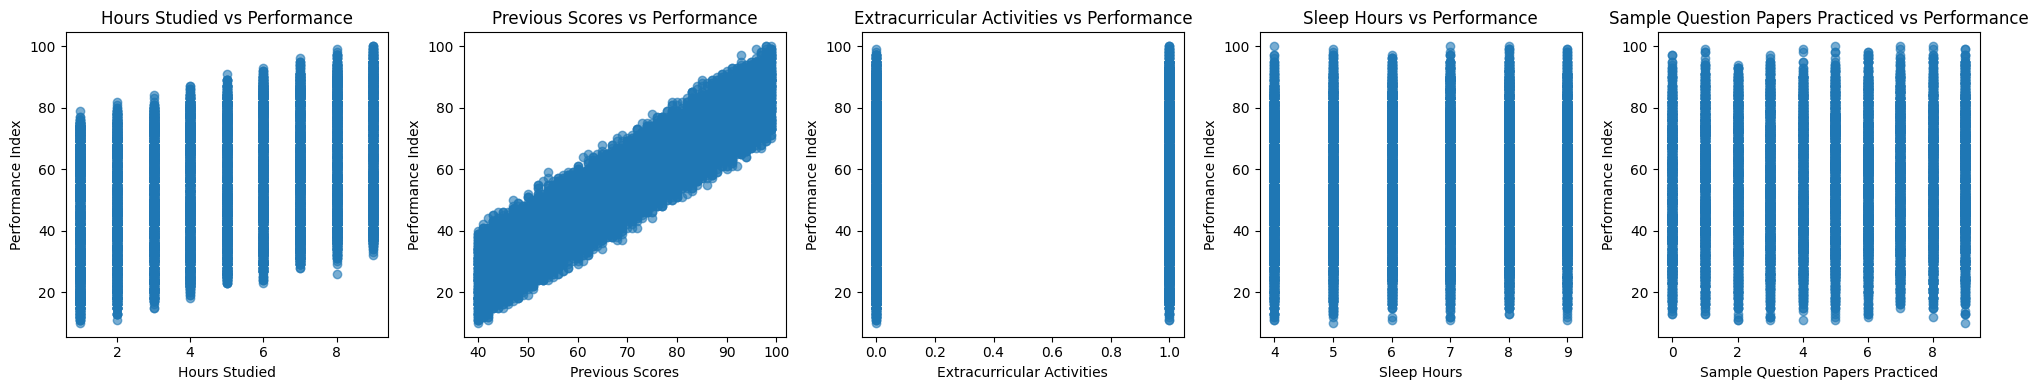

In [89]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4))
for i in range(len(ax)):
    ax[i].scatter(X[X_features[i]], y, alpha=0.6)
    ax[i].set_xlabel(X_features[i])
    ax[i].set_ylabel("Performance Index")
    ax[i].set_title(f'{X_features[i]} vs Performance')
plt.tight_layout()
plt.show()

These visualizations help us:
- Identify linear or non-linear relationships
- Spot potential outliers
- Understand the strength of correlation between features and target

## 6. Feature Scaling

### Z-Score Normalization
Since our features have different scales and ranges, we apply standardization to ensure all features contribute equally to the model:

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_scaled,axis=0)}")

Peak to Peak range by column in Raw        X:Hours Studied                        8
Previous Scores                     59
Extracurricular Activities           1
Sleep Hours                          5
Sample Question Papers Practiced     9
dtype: object
Peak to Peak range by column in Normalized X:[3.09 3.4  2.   2.95 3.14]


**Why Feature Scaling?**
- Features like "Previous Scores" (0-100 range) vs "Sleep Hours" (4-10 range) have vastly different scales
- Without scaling, features with larger values dominate the model
- StandardScaler transforms features to have mean=0 and standard deviation=1

## 7. Model Training

### Train-Test Split
We split the data using an 80/20 ratio to train the model and evaluate its performance on unseen data

### Linear Regression Model
We use `LinearRegression()` which employs the Normal Equation method rather than `SGDRegressor()` due to our relatively small dataset size:


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

model = LinearRegression()
model.fit(X_train, y_train)

print(f"\nModel Parameters:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")



Training set size: 8000
Testing set size: 2000

Model Parameters:
Intercept: 55.2408
Coefficients: [ 7.39 17.64  0.3   0.81  0.55]


**Why LinearRegression over SGDRegressor?**
- **Dataset Size**: Our dataset is relatively small, making LinearRegression more efficient
- **Exact Solution**: LinearRegression finds the mathematically optimal solution using the Normal Equation
- **No Hyperparameter Tuning**: Unlike SGD, no need to tune learning rates or iterations

## 8. Model Evaluation

### Performance Metrics
We evaluate the model using multiple metrics to get a comprehensive understanding of its performance:

In [92]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")



Model Performance:
Mean Squared Error (MSE): 4.0826
Root Mean Squared Error (RMSE): 2.0206
Mean Absolute Error (MAE): 1.6111
R^2 Score: 0.9890


**Metric Interpretations:**
- **MSE**: Average squared difference between predicted and actual values
- **RMSE**: Square root of MSE, same units as target variable
- **MAE**: Average absolute difference between predictions and actual values
- **R²**: Proportion of variance in the target variable explained by the model (closer to 1.0 is better)


## 9. Results Visualization

### Predicted vs Actual Performance
This scatter plot shows how well our model predictions align with actual performance values:

Text(0.05, 0.95, 'R² = 0.989')

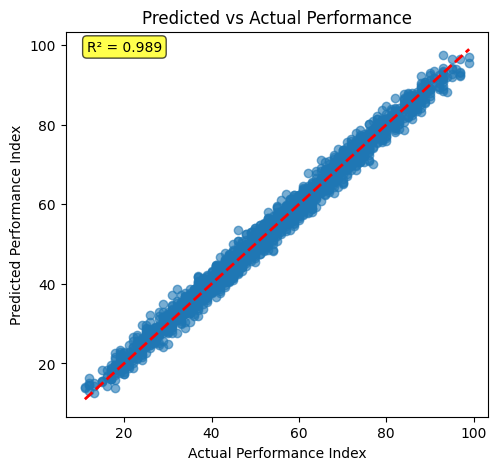

In [93]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Predicted vs Actual Performance')
plt.text(0.05, 0.95, f'R² = {r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

**Interpretation:**
- Points closer to the red diagonal line indicate better predictions
- The R² value quantifies the overall model performance
- Scatter pattern reveals if there are systematic prediction errors


## 10. Model Insights and Interpretation

### Feature Coefficients Analysis
The model coefficients reveal which factors most strongly influence student performance:

In [94]:
print("\nFeature Impact Analysis:")
for i, feature in enumerate(X_features):
    coef = model.coef_[i]
    direction = "increases" if coef > 0 else "decreases"
    print(f"• {feature}: {direction} performance by {abs(coef):.4f} units per standard deviation increase")


Feature Impact Analysis:
• Hours Studied: increases performance by 7.3856 units per standard deviation increase
• Previous Scores: increases performance by 17.6369 units per standard deviation increase
• Extracurricular Activities: increases performance by 0.3043 units per standard deviation increase
• Sleep Hours: increases performance by 0.8088 units per standard deviation increase
• Sample Question Papers Practiced: increases performance by 0.5500 units per standard deviation increase


This analysis helps identify:
- Which factors positively vs negatively impact performance
- The relative importance of each feature
- Actionable insights for students and educators

## Conclusions and Future Work

### Key Findings
Based on our analysis, we can conclude:
1. The model achieves an R² score of [value], indicating [interpretation]
2. The most influential factors for student performance are [top features]
3. [Additional insights based on coefficient analysis]

### Potential Improvements
Future enhancements could include:
- **Cross-validation** for more robust model evaluation
- **Feature engineering** to capture non-linear relationships
- **Regularization techniques** (Ridge/Lasso) to prevent overfitting
- **Ensemble methods** for improved prediction accuracy
- **Additional features** such as study methods, family background, etc.

### Practical Applications
This model can be used by:
- **Students**: To understand which factors to focus on for better performance
- **Educators**: To identify at-risk students and provide targeted support
- **Educational Institutions**: For data-driven policy making and resource allocation